<a href="https://colab.research.google.com/github/kiyer722/COVID19_data_analysis/blob/main/DataAnalysis/%EA%B9%80%EA%B0%80%EC%98%81/2019%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

전처리

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/covid19데이터마이닝/최종 데이터/2019data(mapping_ver3).csv")

In [ ]:
data.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,0,2019,1,1000985,암사길,CS200003,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,1
1,1,2019,1,1000985,암사길,CS300018,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,1
2,2,2019,1,1000985,암사길,CS300002,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,1
3,3,2019,1,1000985,암사길,CS100005,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,1
4,4,2019,1,1000985,암사길,CS100006,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,1


In [ ]:
data=data.drop(data.columns[[0,1,2,3,4,5]],axis='columns')
data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,1
1,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,1
2,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,1
3,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,1
4,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,1


In [ ]:
test=data.sample(frac=0.3,replace=False,random_state=1)
train=data.sample(frac=0.7,replace=False,random_state=7)

In [ ]:
train_data=train.drop('상권_변화_지표',axis=1)

In [ ]:
train_data.shape

(70405, 12)

In [ ]:
test.shape

(30173, 13)

In [ ]:
train_data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균
98012,11016724.0,529,0,0,0,892393,5044,331,62,13,109,57
17046,863846629.0,39388,29,0,0,1387785,4152,798,57,15,93,45
1230,81908273.0,453,4,0,0,554139,1304,240,3,19,107,54
17530,2913668.0,219,1,0,0,224444,532,2812,7,13,115,51
42074,169460174.0,3417,3,0,0,333639,1576,6841,2,58,57,36


In [ ]:
test.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
84379,3.356696e+07,1730,3,1,0,807760,2267,63,16,6,111,48,0
10241,2.345748e+09,61738,27,4,3,1414684,4207,230,26,14,95,52,1
28538,1.200149e+08,2614,0,0,0,99411,519,319,0,25,87,48,1
62691,5.606278e+08,42534,4,0,0,347034,927,288,13,27,123,61,1
22900,1.004183e+08,7808,1,0,0,1026537,4286,164,99,13,103,50,1


머신러닝

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
target=train['상권_변화_지표']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70405 entries, 98012 to 64838
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   당월_매출_금액     70405 non-null  float64
 1   당월_매출_건수     70405 non-null  int64  
 2   점포_수         70405 non-null  int64  
 3   개업_점포_수      70405 non-null  int64  
 4   폐업_점포_수      70405 non-null  int64  
 5   총_유동인구_수     70405 non-null  int64  
 6   총 상주인구 수     70405 non-null  int64  
 7   총_직장_인구_수    70405 non-null  int64  
 8   아파트_단지_수     70405 non-null  int64  
 9   집객시설_수       70405 non-null  int64  
 10  운영_영업_개월_평균  70405 non-null  int64  
 11  폐업_영업_개월_평균  70405 non-null  int64  
 12  상권_변화_지표     70405 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf=DecisionTreeClassifier(max_depth=5)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.97727596 0.98040051 0.98082659 0.97926431 0.97741798 0.97627841
 0.97869318 0.97926136 0.97840909 0.97982955]


In [ ]:
round(np.mean(score)*100,2)

97.88

In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.97812811 0.97883823 0.97827013 0.97713393 0.97542963 0.97613636
 0.97698864 0.97798295 0.97542614 0.97642045]


In [ ]:
round(np.mean(score)*100,2)

97.71

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.96974862 0.89859395 0.94972305 0.97315722 0.96165317 0.97144886
 0.97713068 0.96860795 0.92017045 0.86207386]


In [ ]:
round(np.mean(score)*100,2)

94.52

운영/폐업 드롭

In [ ]:
train1=train.drop(train.columns[[10,11]],axis='columns')
train1.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
98012,11016724.0,529,0,0,0,892393,5044,331,62,13,1
17046,863846629.0,39388,29,0,0,1387785,4152,798,57,15,1
1230,81908273.0,453,4,0,0,554139,1304,240,3,19,1
17530,2913668.0,219,1,0,0,224444,532,2812,7,13,0
42074,169460174.0,3417,3,0,0,333639,1576,6841,2,58,1


In [ ]:
train1_data=train_data.drop(train_data.columns[[10,11]],axis='columns')
train1_data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수
98012,11016724.0,529,0,0,0,892393,5044,331,62,13
17046,863846629.0,39388,29,0,0,1387785,4152,798,57,15
1230,81908273.0,453,4,0,0,554139,1304,240,3,19
17530,2913668.0,219,1,0,0,224444,532,2812,7,13
42074,169460174.0,3417,3,0,0,333639,1576,6841,2,58


In [ ]:
test1=test.drop(train.columns[[10,11]],axis='columns')
test1.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
84379,3.356696e+07,1730,3,1,0,807760,2267,63,16,6,0
10241,2.345748e+09,61738,27,4,3,1414684,4207,230,26,14,1
28538,1.200149e+08,2614,0,0,0,99411,519,319,0,25,1
62691,5.606278e+08,42534,4,0,0,347034,927,288,13,27,1
22900,1.004183e+08,7808,1,0,0,1026537,4286,164,99,13,1


In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train1_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81849169 0.80854992 0.82062207 0.82289448 0.81593524 0.81590909
 0.809375   0.82045455 0.81434659 0.8171875 ]


In [ ]:
round(np.mean(score)*100,2)

81.64

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train1_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81678739 0.80684562 0.81792359 0.82275245 0.81139043 0.81136364
 0.80625    0.81974432 0.81178977 0.81676136]


In [ ]:
round(np.mean(score)*100,2)

81.42

*MinMaxScaler*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.1f}".format(x)})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
X_MinMax_train = min_max_scaler.fit_transform(train1_data)

In [ ]:
X_MinMax_train

array([[0.0, 0.0, 0.0, ..., 0.0, 0.1, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.1, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.1],
       [0.0, 0.0, 0.0, ..., 0.0, 0.1, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.1]])

In [ ]:
train1_new=train1_data

In [ ]:
X_MinMax_new = min_max_scaler.transform(train1_new)

In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, X_MinMax_new, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

81.64

In [ ]:
target=train1['상권_변화_지표']

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, X_MinMax_new, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

81.41

시각화하기

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data.columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month','Answer']

In [ ]:
data.head()

,Sales amount,Sales number,stores,open store,closed store,floating population,resident population,working population,apartment,facility,Operating month,Closed month,Answer
0,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,1
1,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,1
2,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,1
3,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,1
4,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100578 entries, 0 to 100577
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Sales amount         100578 non-null  float64
 1   Sales number         100578 non-null  int64  
 2   stores               100578 non-null  int64  
 3   open store           100578 non-null  int64  
 4   closed store         100578 non-null  int64  
 5   floating population  100578 non-null  int64  
 6   resident population  100578 non-null  int64  
 7   working population   100578 non-null  int64  
 8   apartment            100578 non-null  int64  
 9   facility             100578 non-null  int64  
 10  Operating month      100578 non-null  int64  
 11  Closed month         100578 non-null  int64  
 12  Answer               100578 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 10.0 MB


In [ ]:
X=np.array(pd.DataFrame(data,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month']))

In [ ]:
y=np.array(pd.DataFrame(data,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[634167293.0, 71660.0, 4.0, ..., 6.0, 84.0, 52.0],
       [1410576942.0, 4063.0, 27.0, ..., 106.0, 118.0, 49.0],
       [45895988.0, 47.0, 1.0, ..., 2.0, 109.0, 51.0],
       ...,
       [263358998.0, 8001.0, 1.0, ..., 13.0, 109.0, 47.0],
       [1612514588.0, 21277.0, 5.0, ..., 16.0, 89.0, 49.0],
       [234864001.0, 16468.0, 2.0, ..., 16.0, 80.0, 47.0]])

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep +'/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data.columns.tolist()
feature_names = feature_names[0:5]+feature_names[5:12]

In [ ]:
feature_names

['Sales amount',
 'Sales number',
 'stores',
 'open store',
 'closed store',
 'floating population',
 'resident population',
 'working population',
 'apartment',
 'facility',
 'Operating month',
 'Closed month']

In [ ]:
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 4)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

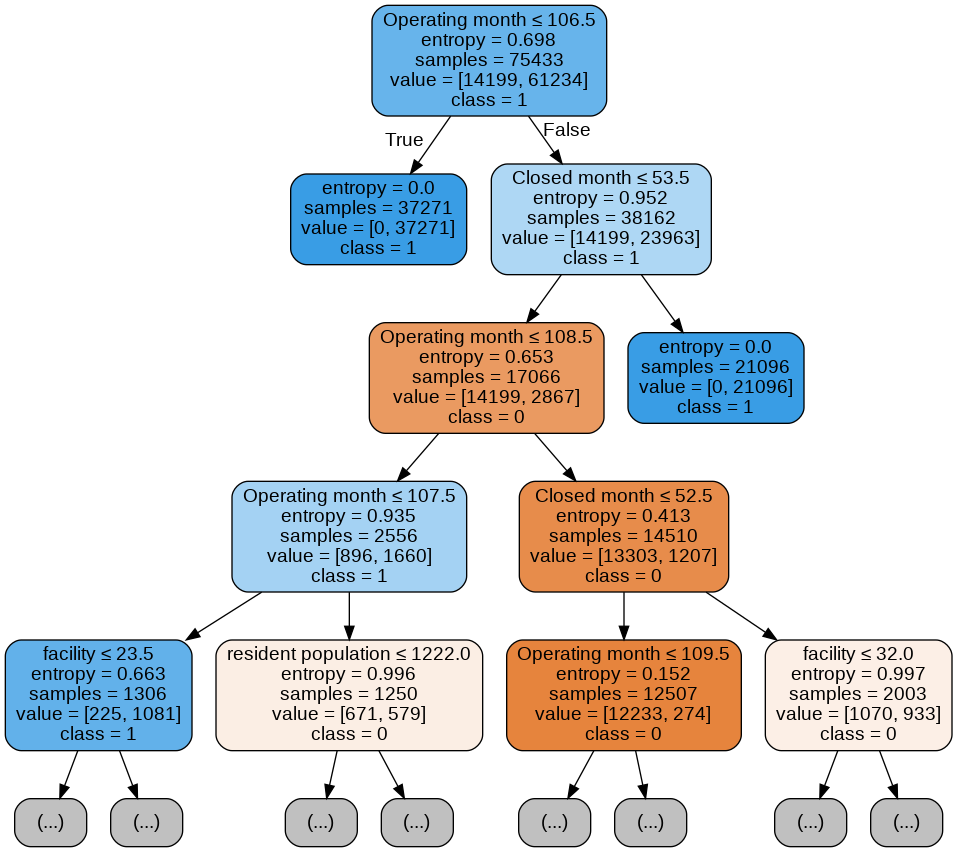

In [ ]:
Image(dt_graph.create_png())

In [ ]:
data1=data.drop(data.columns[[10,11]],axis='columns')
data1.head()

,Sales amount,Sales number,stores,open store,closed store,floating population,resident population,working population,apartment,facility,Answer
0,20061598.0,125,3,0,1,1691955,7132,257,96,13,1
1,51140049.0,5122,2,0,0,1691955,7132,257,96,13,1
2,951735545.0,122840,2,0,1,1691955,7132,257,96,13,1
3,24860481.0,3306,3,2,0,1691955,7132,257,96,13,1
4,10524597.0,322,1,0,0,1691955,7132,257,96,13,1


In [ ]:
target=data1['Answer']

In [ ]:
X=np.array(pd.DataFrame(data1,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility']))

In [ ]:
y=np.array(pd.DataFrame(data1,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[667719659.0, 74646.0, 12.0, ..., 663.0, 14.0, 87.0],
       [102000000.0, 2973.0, 2.0, ..., 633.0, 24.0, 38.0],
       [30143076.0, 1274.0, 10.0, ..., 158.0, 53.0, 14.0],
       ...,
       [12215321.0, 27.0, 7.0, ..., 468.0, 68.0, 13.0],
       [47471451.0, 1609.0, 2.0, ..., 1272.0, 159.0, 36.0],
       [40828854.0, 895.0, 5.0, ..., 291.0, 40.0, 22.0]])

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
os.environ["PATH"] += os.pathsep +'/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data1.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 4)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

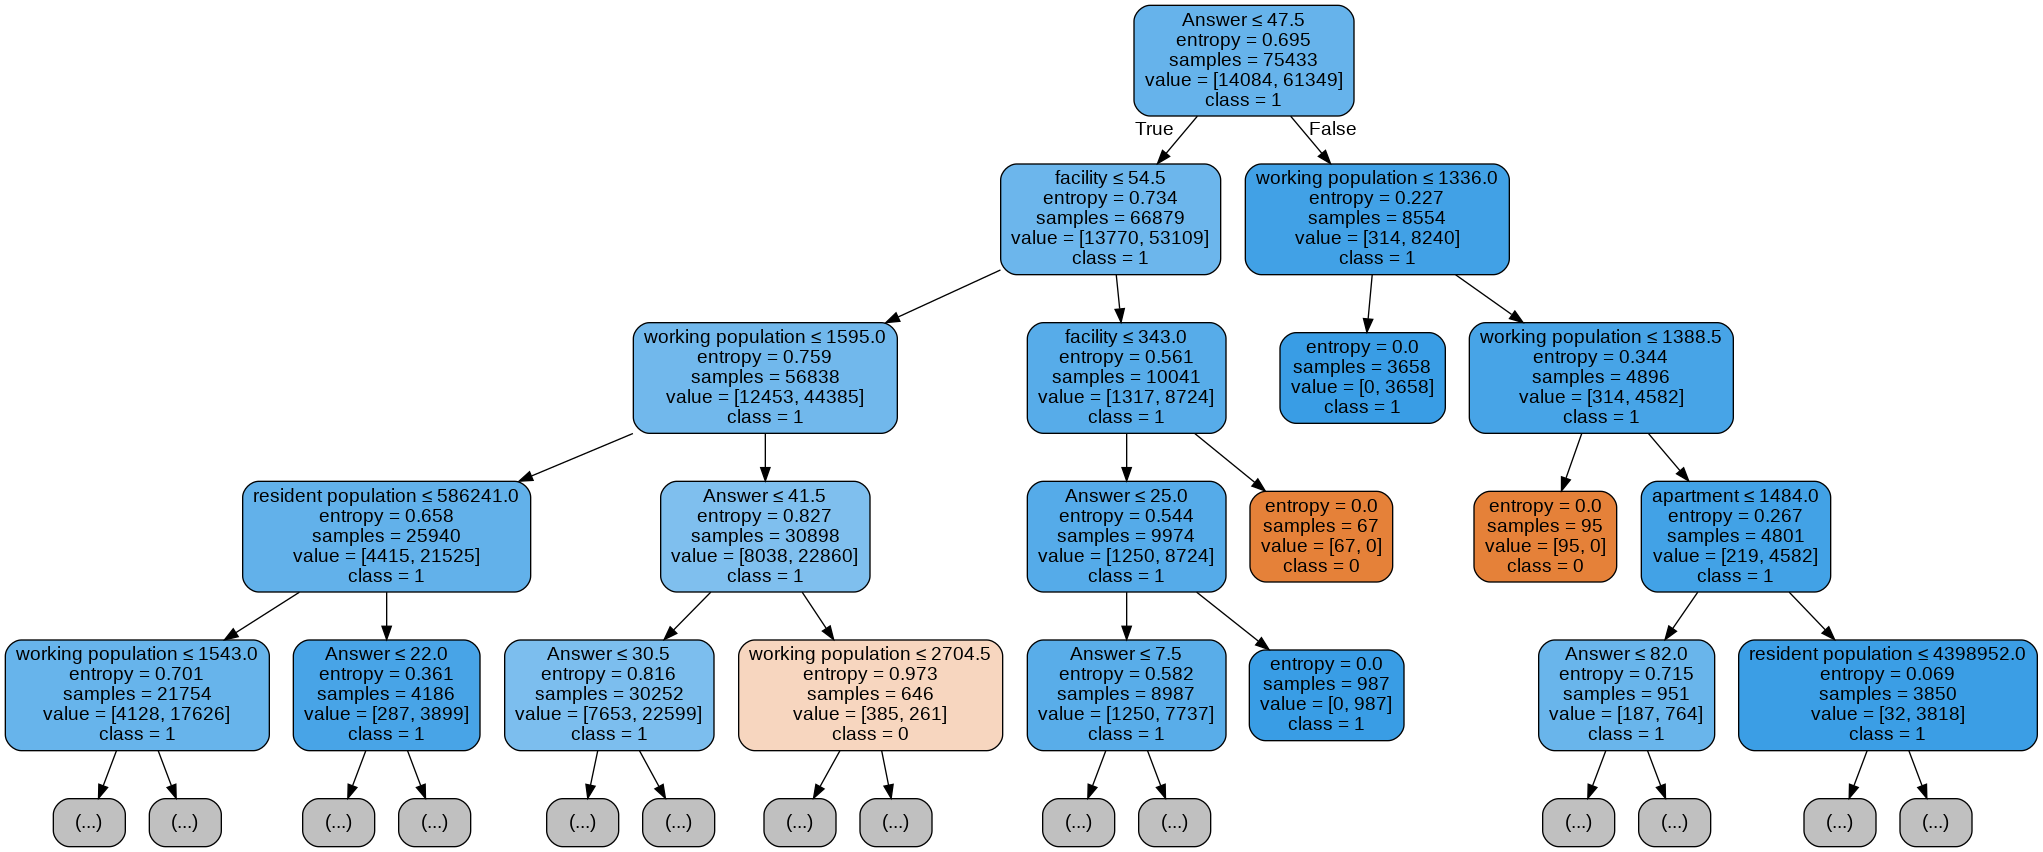

In [ ]:
Image(dt_graph.create_png())

R 시각화

In [ ]:
X=np.array(pd.DataFrame(data,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month']))

In [ ]:
y=np.array(pd.DataFrame(data,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[1399662631.0, 41856.0, 15.0, ..., 16.0, 122.0, 61.0],
       [300501142.0, 12847.0, 4.0, ..., 8.0, 87.0, 53.0],
       [34335943.0, 1057.0, 9.0, ..., 10.0, 105.0, 48.0],
       ...,
       [188955933.0, 20190.0, 5.0, ..., 17.0, 122.0, 57.0],
       [24000000.0, 119.0, 7.0, ..., 10.0, 76.0, 44.0],
       [46509440.0, 4923.0, 6.0, ..., 12.0, 97.0, 52.0]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
estimator = rf_clf.estimators_[6]

In [ ]:
feature_names = data.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_names = np.array(['0', '1'])

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=4)

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)

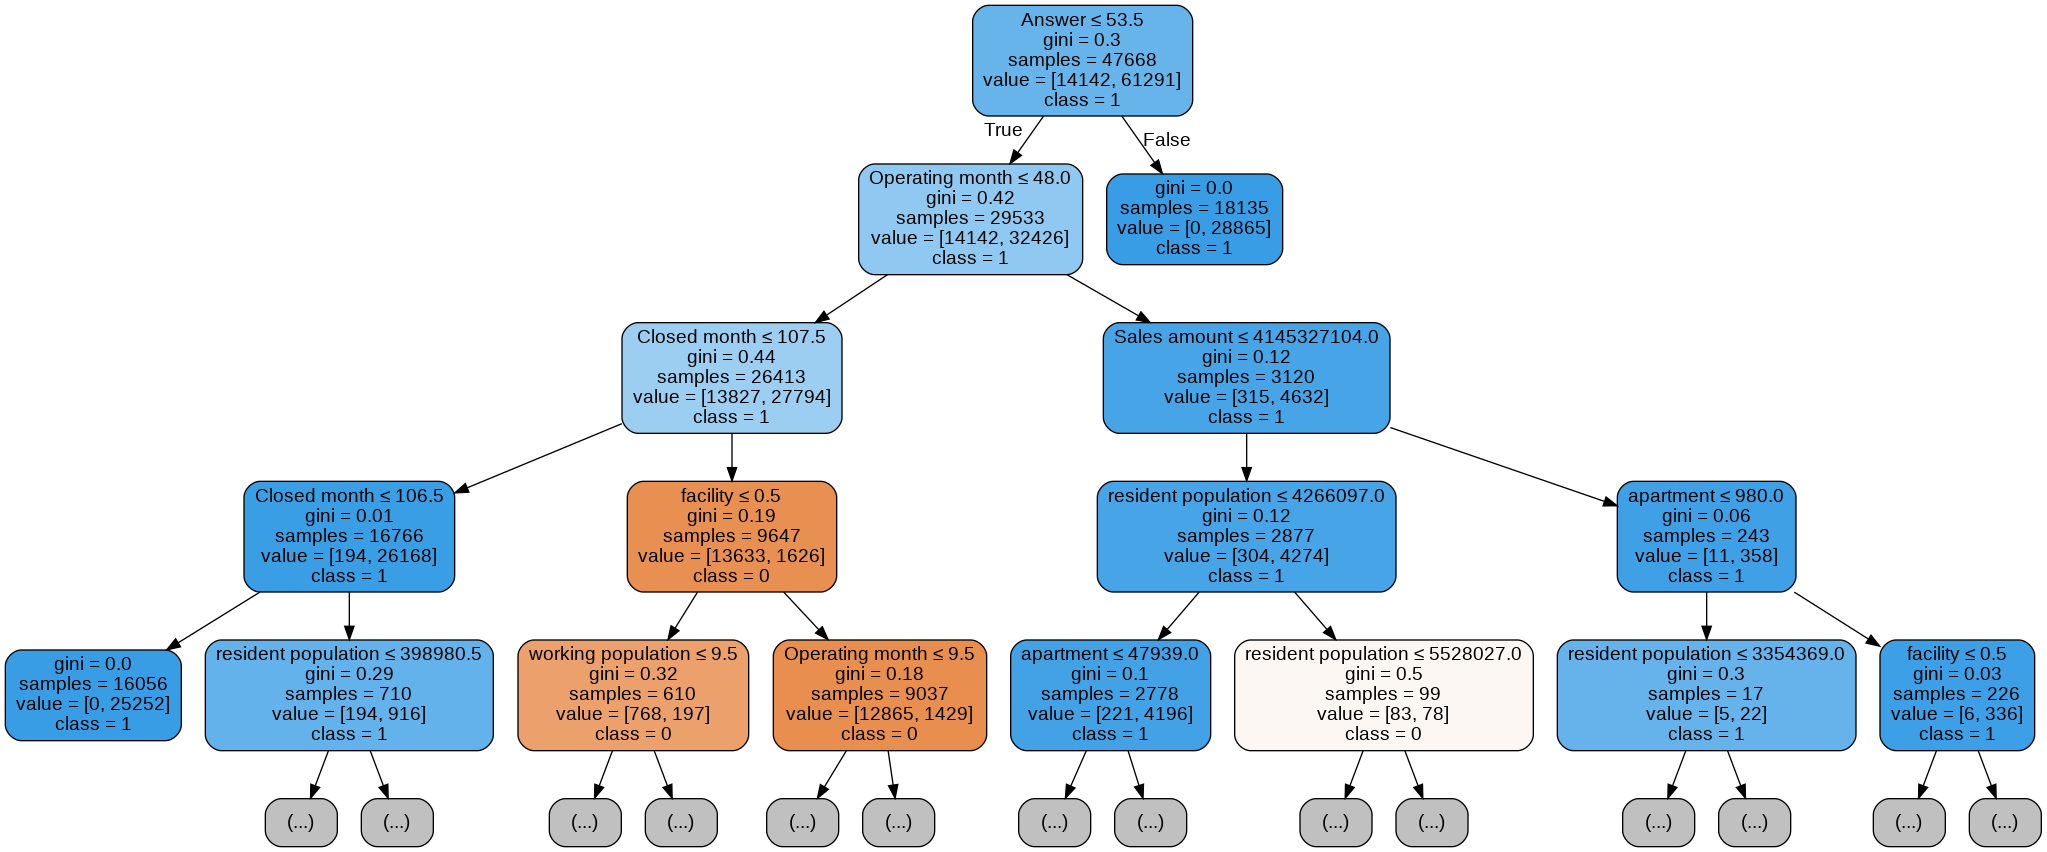

In [ ]:
Image(rf_graph.create_png())

In [ ]:
X=np.array(pd.DataFrame(data1,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility']))

In [ ]:
y=np.array(pd.DataFrame(data1,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[1199127286.0, 34551.0, 21.0, ..., 46.0, 0.0, 14.0],
       [1890602.0, 236.0, 22.0, ..., 69308.0, 10.0, 84.0],
       [10292726.0, 132.0, 2.0, ..., 958.0, 23.0, 8.0],
       ...,
       [94376127.0, 1343.0, 4.0, ..., 310.0, 32.0, 15.0],
       [27923932.0, 1068.0, 8.0, ..., 119.0, 41.0, 5.0],
       [24266830.0, 1065.0, 3.0, ..., 190.0, 4.0, 12.0]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
estimator = rf_clf.estimators_[6]

In [ ]:
feature_names = data1.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_names = np.array(['0', '1'])

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=4)

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)

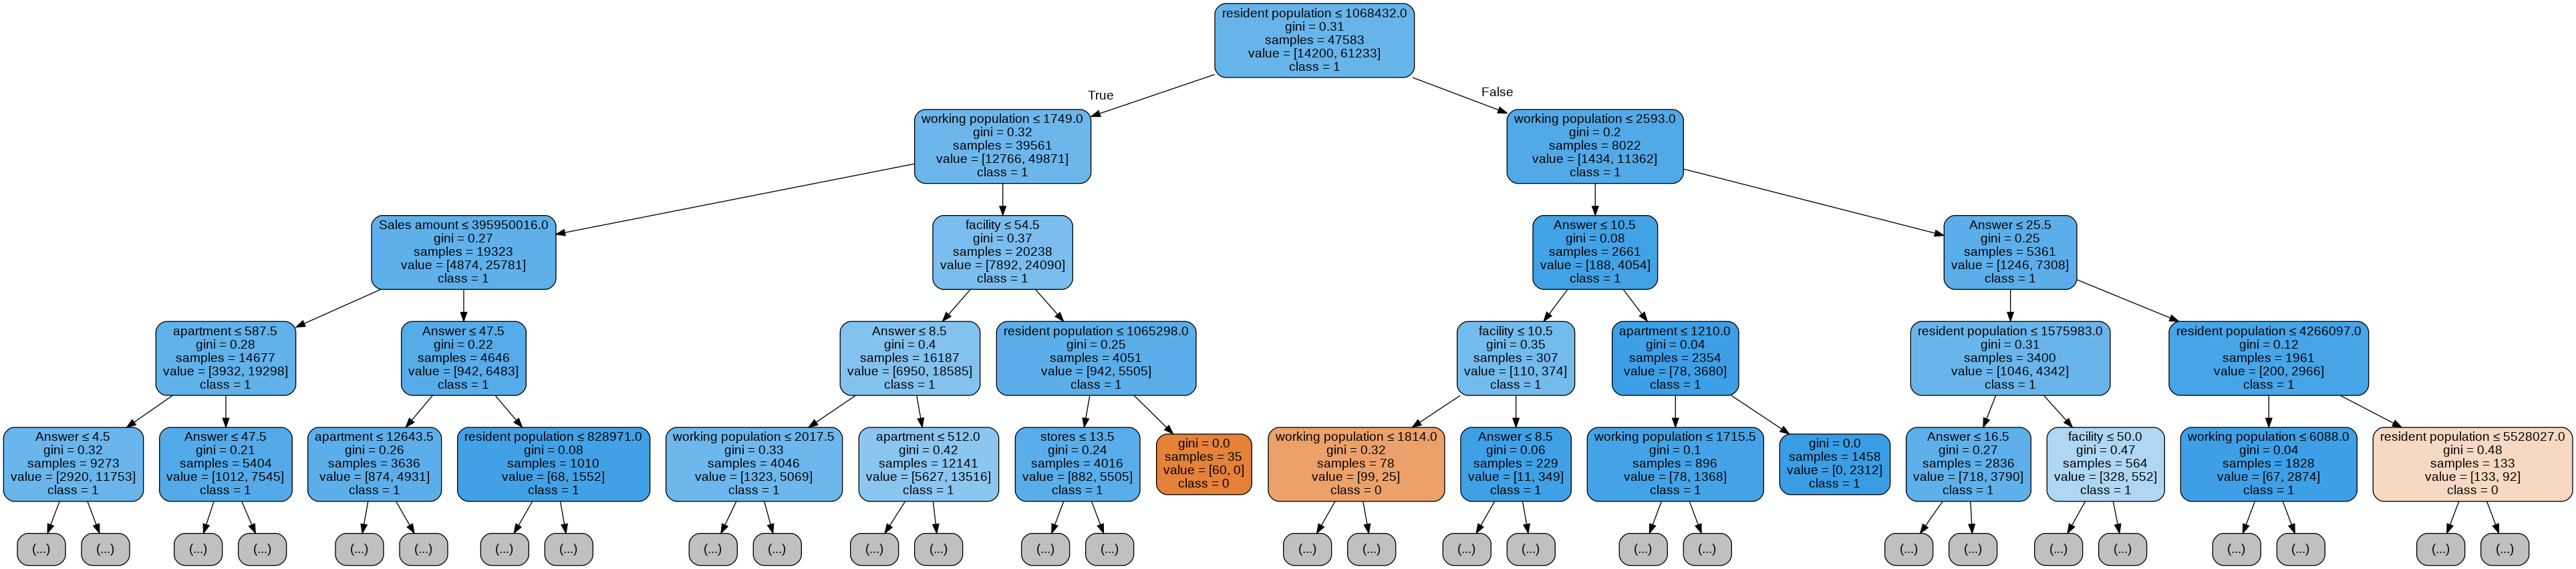

In [ ]:
Image(rf_graph.create_png())

정답률 낮추기 시도

In [ ]:
test2=test1.drop(test1.columns[[2,3,4]],axis='columns')
test2.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
84379,3.356696e+07,1730,807760,2267,63,16,6,0
10241,2.345748e+09,61738,1414684,4207,230,26,14,1
28538,1.200149e+08,2614,99411,519,319,0,25,1
62691,5.606278e+08,42534,347034,927,288,13,27,1
22900,1.004183e+08,7808,1026537,4286,164,99,13,1


In [ ]:
train2=train1.drop(train1.columns[[2,3,4]],axis='columns')
train2.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
98012,11016724.0,529,892393,5044,331,62,13,1
17046,863846629.0,39388,1387785,4152,798,57,15,1
1230,81908273.0,453,554139,1304,240,3,19,1
17530,2913668.0,219,224444,532,2812,7,13,0
42074,169460174.0,3417,333639,1576,6841,2,58,1


In [ ]:
train2_data=train1_data.drop(train1_data.columns[[2,3,4]],axis='columns')
train2_data.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수
98012,11016724.0,529,892393,5044,331,62,13
17046,863846629.0,39388,1387785,4152,798,57,15
1230,81908273.0,453,554139,1304,240,3,19
17530,2913668.0,219,224444,532,2812,7,13
42074,169460174.0,3417,333639,1576,6841,2,58


In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train2_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

81.64